In [2]:
#General
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import combat
from combat import combat
import patsy

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [31]:
#Creating a data frame for each group of lipids

data = pd.ExcelFile('200530_raw_dataset_all_modes_allkinases.xlsx')
df_cl = pd.read_excel(data, 'merged_cl')
df_p1 = pd.read_excel(data, 'merged_p1')
df_p2 = pd.read_excel(data, 'merged_p2')
df_n1 = pd.read_excel(data, 'merged_n1_OK')
df_cn = pd.read_excel(data, 'cell number')

In [32]:
#copy dataframe 


data_cl = df_cl
data_p1 = df_p1
data_p2 = df_p2
data_n1 = df_n1
data_cn = df_cn
#Plot to see amount of measures in each series for each gene 
#data_cl.groupby(['Series_cl','GENE'])['GENE'].count().plot.bar()



In [ ]:
# convert the lipid columns to float

data_cl.iloc[:,9:123] = data_cl.iloc[:,9:123].apply(pd.to_numeric, errors='coerce')
data_p1.iloc[:,9:279] = data_p1.iloc[:,9:279].apply(pd.to_numeric, errors='coerce')
data_p2.iloc[:,9:206] = data_p2.iloc[:,9:206].apply(pd.to_numeric, errors='coerce')
data_n1.iloc[:,9:278] = data_n1.iloc[:,9:278].apply(pd.to_numeric, errors='coerce')

In [ ]:
# take the columns with less than 50 percent nan of total entries

data_cl = data_cl.loc[:, data_cl.isnull().sum() < 0.5*data_cl.shape[0]]
data_p1 = data_p1.loc[:, data_p1.isnull().sum() < 0.5*data_p1.shape[0]]
data_p2 = data_p2.loc[:, data_p2.isnull().sum() < 0.5*data_p2.shape[0]]
data_n1 = data_n1.loc[:, data_n1.isnull().sum() < 0.5*data_n1.shape[0]]


In [ ]:
# Eliminate standards

#convert to series
nunique_p2 = data_p2.apply(pd.Series.nunique)
nunique_p1 = data_p1.apply(pd.Series.nunique)
nunique_n1 = data_n1.apply(pd.Series.nunique)
nunique_cl = data_cl.apply(pd.Series.nunique)


# columns to drop
cols_to_drop_cl = nunique_cl[nunique_cl == 1].index
cols_to_drop_p1 = nunique_p1[nunique_p1 == 1].index
cols_to_drop_p2 = nunique_p2[nunique_p2 == 1].index
cols_to_drop_n1 = nunique_n1[nunique_n1 == 1].index

data_cl=data_cl.drop(cols_to_drop_cl, axis=1)
data_p1=data_p1.drop(cols_to_drop_p1, axis=1)
data_p2=data_p2.drop(cols_to_drop_p2, axis=1)
data_n1=data_n1.drop(cols_to_drop_n1, axis=1)

In [ ]:
#Goupby and replace NaN with mean for each GENE in each batch

data_cl = data_cl.groupby(['GENE','Series_cl']).apply(lambda x: x.fillna(x.mean()))
data_p1 = data_p1.groupby(['GENE','Series_p1']).apply(lambda x: x.fillna(x.mean()))
data_p2 = data_p2.groupby(['GENE','Series_p2']).apply(lambda x: x.fillna(x.mean()))
data_n1 = data_n1.groupby(['GENE','Series_p1']).apply(lambda x: x.fillna(x.mean()))

In [ ]:
#Reseting the index

data_cl = data_cl.reset_index(drop = True)
data_p1 = data_p1.reset_index(drop = True)
data_p2 = data_p2.reset_index(drop = True)
data_n1 = data_n1.reset_index(drop = True)

In [ ]:
#Replace NaN with mean for each GENE

data_cl = data_cl.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_p1 = data_p1.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_p2 = data_p2.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_n1 = data_n1.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))

In [ ]:
#Reseting the index

data_cl = data_cl.reset_index(drop = True)
data_p1 = data_p1.reset_index(drop = True)
data_p2 = data_p2.reset_index(drop = True)
data_n1 = data_n1.reset_index(drop = True)

In [ ]:
#Replace NaN with mean of the column

data_cl.iloc[:,9:300] = data_cl.iloc[:,9:300].apply(lambda x: x.fillna(x.mean()))
data_n1.iloc[:,9:300] = data_n1.iloc[:,9:300].apply(lambda x: x.fillna(x.mean()))
data_p2.iloc[:,9:300] = data_p2.iloc[:,9:300].apply(lambda x: x.fillna(x.mean()))
data_p1.iloc[:,9:300] = data_p1.iloc[:,9:300].apply(lambda x: x.fillna(x.mean()))

In [33]:
data_cn.to_csv('data_cellnumber.csv')
data_cl.to_csv('data_befbatch_cl.csv')
data_n1.to_csv('data_befbatch_n1.csv')
data_p2.to_csv('data_befbatch_p2.csv')
data_p1.to_csv('data_befbatch_p1.csv')

In [41]:
data_cn = pd.read_csv('data_cellnumber.csv')
data_cl = pd.read_csv('data_befbatch_cl.csv')
data_n1 = pd.read_csv('data_befbatch_n1.csv')
data_p2 = pd.read_csv('data_befbatch_p2.csv')
data_p1 = pd.read_csv('data_befbatch_p1.csv')

In [42]:
#Elimination of unnecesary columns

data_cl=data_cl.drop(['Unnamed: 0','CP0_ID','BR','Good_bad','CP_plate','Toxic','CP0_ID.mode.BR'], axis=1)
data_n1=data_n1.drop(['Unnamed: 0','CP0_ID','BR','Good_bad','CP_plate','Toxic','CP0_ID.mode.BR'], axis=1)
data_p2=data_p2.drop(['Unnamed: 0','CP0_ID','BR','Good_bad','CP_plate','Toxic','CP0_ID.mode.BR'], axis=1)
data_p1=data_p1.drop(['Unnamed: 0','CP0_ID','BR','Good_bad','CP_plate','Toxic','CP0_ID.mode.BR'], axis=1)

In [43]:
#Changin the name of the Series columns for "Batch"

data_cl.rename(columns = {'Series_cl':'Batch'}, inplace = True)
data_n1.rename(columns = {'Series_p1':'Batch'}, inplace = True)
data_p2.rename(columns = {'Series_p2':'Batch'}, inplace = True)
data_p1.rename(columns = {'Series_p1':'Batch'}, inplace = True)

In [44]:
#Merging of the datasets of all the lipids

data_concat = pd.concat([data_cl, data_n1,data_p1,data_p2], axis=1)
data_concat = data_concat.loc[:,~data_concat.columns.duplicated()]

# And the cell number
data_concat = data_concat.merge(data_cn, on='CP0_ID.BR')

In [45]:
#Elimination of unnecesary columns
data_concat = data_concat.drop(['Unnamed: 0','CP0_ID.BR','BR','CP0_ID','CP_plate','GENE_y','Series', 'Cell area covered by objects (%)'], axis=1)

In [47]:
#Same process as before but for cell number
data_concat['Cell number'] = data_concat['Cell number'].apply(pd.to_numeric, errors='coerce')
data_concat = data_concat.groupby(['GENE_x','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE_x']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [3]:
# Loading / Saving dataset

#data_concat.to_csv('rawdata_allkinases.csv')
data_concat = pd.read_csv('rawdata_allkinases.csv')
data_concat = data_concat.drop(['Unnamed: 0'], axis=1)

In [137]:
pd.set_option('display.max_rows', 10000)
data_concat['Cell number'].sort_values()

1997      52.000000
1996      52.000000
1995      52.000000
1994      52.000000
1993      52.000000
1992      52.000000
7070      78.000000
7073      78.000000
7069      78.000000
7072      78.000000
7071      78.000000
7068      78.000000
2883      81.000000
2880      81.000000
2885      81.000000
2886      81.000000
2887      81.000000
2888      81.000000
2889      81.000000
2890      81.000000
2891      81.000000
2882      81.000000
2881      81.000000
2884      81.000000
6684     108.000000
6686     108.000000
6685     108.000000
6687     108.000000
6688     108.000000
6689     108.000000
5525     110.000000
5524     110.000000
5520     110.000000
5523     110.000000
5522     110.000000
5521     110.000000
4545     175.000000
4546     175.000000
4542     175.000000
4543     175.000000
4544     175.000000
4547     175.000000
884      182.000000
5237     182.000000
885      182.000000
886      182.000000
887      182.000000
5236     182.000000
5235     182.000000
5234     182.000000


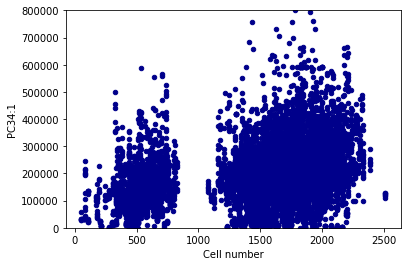

In [138]:
ax1 = data_concat.plot.scatter(x='Cell number',
                       y='PC34:1',
                       c='DarkBlue')
plt.ylim(0, 800000)

plt.savefig("pc34vscellnumber.png")

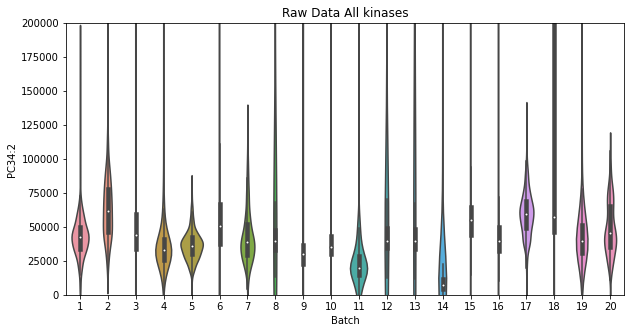

In [115]:
plt.figure (figsize=(10,5))
plt.ylim(0, 200000)
plt.title('Raw Data All kinases', fontsize = 12)
sns_plot=sns.violinplot(x="Batch", y="PC34:2", data=data_concat, width=0.8)

plt.savefig("rawdata_allkinases.png")

In [50]:
# Normalising the data by Cell Number
data_concat_cn = data_concat
data_concat_cn.iloc[:,2:756] = data_concat_cn.iloc[:,2:756].div(data_concat_cn['Cell number'], axis=0)
data_concat_cn = data_concat_cn.drop(['Cell number'], axis=1)
data_concat_cn.to_csv('data_normalized_cellnumber.csv')

In [100]:
data_concat_cn = pd.read_csv('data_normalized_cellnumber.csv')
data_concat_cn = data_concat_cn.drop(['Unnamed: 0'], axis=1)

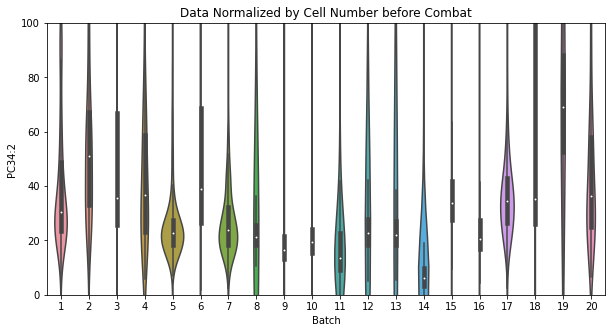

In [116]:
plt.figure (figsize=(10,5))
plt.ylim(0, 100)
plt.title('Data Normalized by Cell Number before Combat', fontsize = 12)
sns.violinplot(x="Batch", y="PC34:2", data=data_concat_cn, width=0.8)

plt.savefig("data_normalized_cellnumber.png")

In [58]:
# Normalising the data by PC34:1
data_concat_pc = data_concat
data_concat_pc.iloc[:,2:756] = data_concat_pc.iloc[:,2:756].div(data_concat_pc['PC34:1'], axis=0)
data_concat_pc = data_concat_pc.drop(['Cell number', 'PC34:1'], axis=1)
data_concat_pc.to_csv('data_normalized_pc34.csv')

In [98]:
data_concat_pc = pd.read_csv('data_normalized_pc34.csv')
data_concat_pc = data_concat_pc.drop(['Unnamed: 0'], axis=1)

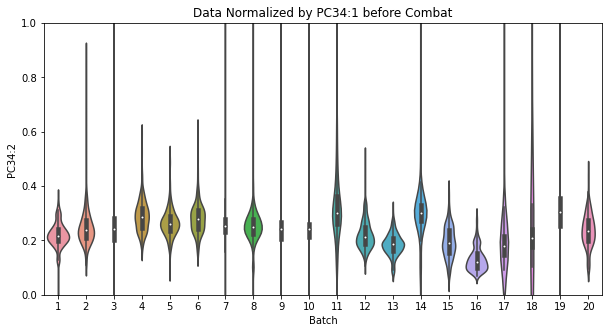

In [117]:
plt.figure (figsize=(10,5))
plt.ylim(0, 1)
plt.title('Data Normalized by PC34:1 before Combat', fontsize = 12)
sns.violinplot(x="Batch", y="PC34:2", data=data_concat_pc, width=0.8)

plt.savefig("data_normalized_PC34:1.png")

In [ ]:
plt.figure (figsize=(10,5))
plt.ylim(0, 1000)
sns.violinplot(x="Batch", y="PC34:1", data=data_concat_cn, width=0.8)

In [61]:
data_concat

,GENE_x,Batch,CL68:3_C16:0,CL68:3_C16:1,CL68:3_C18:1,CL68:3_C18:2,CL68:4_C16:0,CL68:4_C16:1,CL68:4_C18:1,CL68:4_C18:2,...,GlcDHCer40:0,GlcDHCer40:0-OH,GlcDHCer40:1,GlcDHCer42:0,GlcDHCer42:0-OH,GlcDHCer42:1,GlcDHCer44:0,GlcDHCer44:0-OH,GlcDHCer44:1,Cell number
0,AAK1,9,0.004016,0.004532,0.013352,0.000257,0.000930,0.016734,0.023939,0.001634,...,0.000023,0.000012,0.000010,0.000029,0.000018,0.000026,0.000014,0.000007,0.000013,0.008391
1,AAK1,9,0.003464,0.003843,0.012717,0.000252,0.000787,0.014028,0.018999,0.001429,...,0.000021,0.000012,0.000007,0.000042,0.000022,0.000022,0.000012,0.000010,0.000013,0.007711
2,AAK1,9,0.004678,0.005025,0.016497,0.000292,0.001010,0.019696,0.027868,0.001878,...,0.000031,0.000021,0.000011,0.000052,0.000028,0.000037,0.000020,0.000011,0.000013,0.009737
3,AAK1,9,0.004074,0.004470,0.012528,0.000243,0.000779,0.016755,0.024359,0.001569,...,0.000020,0.000012,0.000007,0.000032,0.000028,0.000024,0.000019,0.000006,0.000010,0.008237
4,AAK1,9,0.004237,0.004679,0.013684,0.000291,0.000947,0.016661,0.024400,0.001523,...,0.000018,0.000016,0.000016,0.000026,0.000019,0.000023,0.000012,0.000012,0.000014,0.008707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,ZAP70,4,0.002161,0.001480,0.011397,0.000049,0.004567,0.005126,0.010556,0.000406,...,0.000005,0.000008,0.000004,0.000012,0.000010,0.000033,0.000008,0.000004,0.000005,0.004903
9224,ZAP70,4,0.003680,0.002467,0.014384,0.000038,0.006092,0.007161,0.017180,0.000541,...,0.000007,0.000015,0.000015,0.000028,0.000020,0.000023,0.000016,0.000007,0.000015,0.005304
9225,ZAP70,4,0.001918,0.001031,0.008375,0.000087,0.003020,0.003307,0.007354,0.000253,...,0.000007,0.000013,0.000009,0.000034,0.000019,0.000028,0.000004,0.000006,0.000009,0.003861
9226,ZAP70,4,0.001801,0.002559,0.014980,0.000033,0.005985,0.007868,0.015958,0.000432,...,0.000026,0.000020,0.000013,0.000040,0.000021,0.000048,0.000012,0.000008,0.000009,0.004729


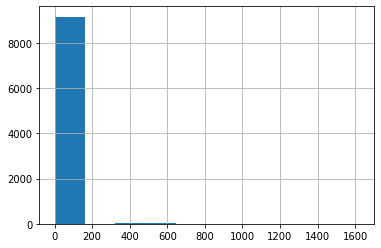

In [10]:
#pd.set_option('display.max_rows', 800)
data_concat['CL68:3_C16:0'].hist()

In [5]:
#Outliers removal INSIDE BATCH (z-score > 3)
z_scores = data_concat.groupby(['GENE','Batch']).transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

/Users/pablo/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [8]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [7]:
#Outliers removal OVERALL (z-score > 3)
z_scores = data_concat.iloc[:,2:755].transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Transform the data to log10 (OPTIONAL)

#data_log = data_concat
#data_log.iloc[:,2:755] = np.log10(data_log.iloc[:,2:755])

In [65]:
# Taking the mean for each kinase

concat_mean = data_concat.groupby(['GENE_x']).mean().reset_index()
concat_mean = concat_mean.drop(['Batch'], axis=1)

In [66]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

concat_mean.iloc[:,2:756] = scaler.fit_transform(concat_mean.iloc[:,2:756].to_numpy())

In [69]:
#MAKE GENE AS INDEX
concat_mean.set_index('GENE_x', inplace=True)

In [ ]:
#Clustermap

ax = sns.clustermap(concat_mean,
                    z_score = 0,
                    cmap="vlag",
                    center=0, 
                    vmin = -1,
                    vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

plt.title('Cluster map of Kinase-Lipid before batch correction -Non-normalized-', fontsize = 60) # title with fontsize 20
plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
plt.ylabel('Kinases', fontsize =80) # y-axis label with fontsize 15

ax.savefig("databeforecombat.png")

In [102]:
# Batch Effect correction dataset normalized by Cell Number

mod_cn = patsy.dmatrix("GENE_x", data_concat_cn, return_type="dataframe")

ebat_cn = combat(data_concat_cn.iloc[:,2:756].T, data_concat_cn['Batch'], mod_cn)

batch_cn = ebat_cn.T
batch_cn.insert(0, 'GENE_x', data_concat_cn.iloc[:,[0]])
batch_cn.insert(1, 'Batch', data_concat_cn.iloc[:,[1]])

batch_cn.to_csv('data_normalized_celln_combat.csv')
#batch_cn = pd.read_csv('data_normalized_celln_combat.csv')

found 20 batches
found 0 numerical covariates...
found 714 categorical variables:	GENE_x[T.AATK ], GENE_x[T.ABCC1 ], GENE_x[T.ABL1 ], GENE_x[T.ABL2 ], GENE_x[T.ACVR1 ], GENE_x[T.ACVR1B ], GENE_x[T.ACVR1C ], GENE_x[T.ACVR2A ], GENE_x[T.ACVR2B ], GENE_x[T.ACVRL1 ], GENE_x[T.ADCK1 ], GENE_x[T.ADCK2 ], GENE_x[T.ADCK4 ], GENE_x[T.ADCK5 ], GENE_x[T.ADK ], GENE_x[T.ADRBK1 ], GENE_x[T.ADRBK2 ], GENE_x[T.AK1 ], GENE_x[T.AK2 ], GENE_x[T.AK3 ], GENE_x[T.AK3L1 ], GENE_x[T.AK3L2 ], GENE_x[T.AK5 ], GENE_x[T.AK7 ], GENE_x[T.AKAP13 ], GENE_x[T.AKT1 ], GENE_x[T.AKT2 ], GENE_x[T.AKT3 ], GENE_x[T.ALDH18A1 ], GENE_x[T.ALK ], GENE_x[T.ALPK1 ], GENE_x[T.ALPK2 ], GENE_x[T.ALPK3 ], GENE_x[T.ALS2CR2 ], GENE_x[T.ALS2CR7 ], GENE_x[T.AMHR2 ], GENE_x[T.ANKK1 ], GENE_x[T.ARAF ], GENE_x[T.ATM ], GENE_x[T.ATR ], GENE_x[T.AURKA ], GENE_x[T.AURKB ], GENE_x[T.AURKC ], GENE_x[T.AXL ], GENE_x[T.BAIAP2 ], GENE_x[T.BCKDK ], GENE_x[T.BCR ], GENE_x[T.BLK ], GENE_x[T.BMP2K ], GENE_x[T.BMPR1A ], GENE_x[T.BMPR1B ], GENE_x[T.BMPR

Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


In [63]:
batch_cn = pd.read_csv('data_normalized_celln_combat.csv')
batch_cn = batch_cn.drop(['Unnamed: 0'], axis=1)

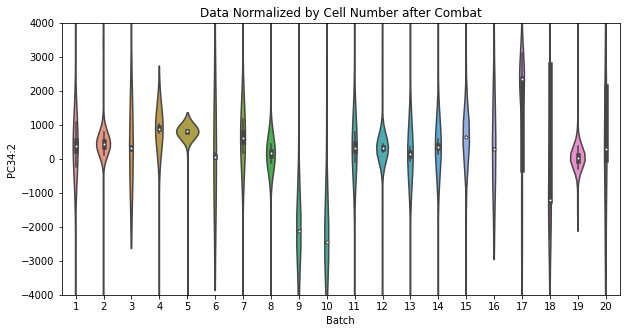

In [118]:
plt.figure (figsize=(10,5))
plt.ylim(-4000, 4000)
plt.title('Data Normalized by Cell Number after Combat', fontsize = 12)
sns.violinplot(x="Batch", y="PC34:2", data=batch_cn, width=0.8)

plt.savefig("data_normalized_celln_combat.png")

In [68]:
# Batch Effect correction dataset normalized by PC34:1

mod_pc = patsy.dmatrix("GENE_x", data_concat_pc, return_type="dataframe")

ebat_pc = combat(data_concat_pc.iloc[:,2:756].T, data_concat_pc['Batch'], mod_pc)

batch_pc = ebat_pc.T
batch_pc.insert(0, 'GENE_x', data_concat_pc.iloc[:,[0]])
batch_pc.insert(1, 'Batch', data_concat_pc.iloc[:,[1]])

batch_pc.to_csv('data_normalized_pc34_combat.csv')
#batch_cn = pd.read_csv('data_normalized_pc34_combat.csv')

found 20 batches
found 0 numerical covariates...
found 714 categorical variables:	GENE_x[T.AATK ], GENE_x[T.ABCC1 ], GENE_x[T.ABL1 ], GENE_x[T.ABL2 ], GENE_x[T.ACVR1 ], GENE_x[T.ACVR1B ], GENE_x[T.ACVR1C ], GENE_x[T.ACVR2A ], GENE_x[T.ACVR2B ], GENE_x[T.ACVRL1 ], GENE_x[T.ADCK1 ], GENE_x[T.ADCK2 ], GENE_x[T.ADCK4 ], GENE_x[T.ADCK5 ], GENE_x[T.ADK ], GENE_x[T.ADRBK1 ], GENE_x[T.ADRBK2 ], GENE_x[T.AK1 ], GENE_x[T.AK2 ], GENE_x[T.AK3 ], GENE_x[T.AK3L1 ], GENE_x[T.AK3L2 ], GENE_x[T.AK5 ], GENE_x[T.AK7 ], GENE_x[T.AKAP13 ], GENE_x[T.AKT1 ], GENE_x[T.AKT2 ], GENE_x[T.AKT3 ], GENE_x[T.ALDH18A1 ], GENE_x[T.ALK ], GENE_x[T.ALPK1 ], GENE_x[T.ALPK2 ], GENE_x[T.ALPK3 ], GENE_x[T.ALS2CR2 ], GENE_x[T.ALS2CR7 ], GENE_x[T.AMHR2 ], GENE_x[T.ANKK1 ], GENE_x[T.ARAF ], GENE_x[T.ATM ], GENE_x[T.ATR ], GENE_x[T.AURKA ], GENE_x[T.AURKB ], GENE_x[T.AURKC ], GENE_x[T.AXL ], GENE_x[T.BAIAP2 ], GENE_x[T.BCKDK ], GENE_x[T.BCR ], GENE_x[T.BLK ], GENE_x[T.BMP2K ], GENE_x[T.BMPR1A ], GENE_x[T.BMPR1B ], GENE_x[T.BMPR

Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


In [69]:
batch_pc = pd.read_csv('data_normalized_pc34_combat.csv')
batch_pc = batch_pc.drop(['Unnamed: 0'], axis=1)

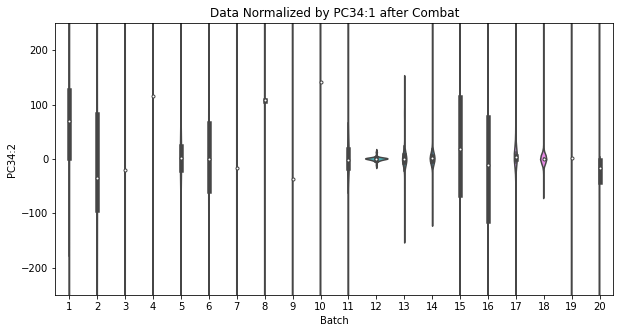

In [119]:
plt.figure (figsize=(10,5))
plt.ylim(-250, 250)
plt.title('Data Normalized by PC34:1 after Combat', fontsize = 12)
sns.violinplot(x="Batch", y="PC34:2", data=batch_pc, width=0.8)

plt.savefig("data_normalized_pc34_combat.png")

In [64]:
batch_pc

,GENE_x,Batch,CL68:3_C16:0,CL68:3_C16:1,CL68:3_C18:1,CL68:3_C18:2,CL68:4_C16:0,CL68:4_C16:1,CL68:4_C18:1,CL68:4_C18:2,...,GlcDHCer38:1,GlcDHCer40:0,GlcDHCer40:0-OH,GlcDHCer40:1,GlcDHCer42:0,GlcDHCer42:0-OH,GlcDHCer42:1,GlcDHCer44:0,GlcDHCer44:0-OH,GlcDHCer44:1
0,AAK1,9,-1.396533,-1.430210,-4.197078,-0.091260,-0.271950,-5.586687,-7.955223,-0.454704,...,-0.002735,-0.004608,-0.002706,-0.003103,-0.009376,-0.007811,-0.006793,-0.002643,-0.003282,-0.004142
1,AAK1,9,-1.396664,-1.430374,-4.197230,-0.091262,-0.271986,-5.587335,-7.956407,-0.454753,...,-0.002736,-0.004609,-0.002706,-0.003103,-0.009373,-0.007810,-0.006794,-0.002643,-0.003281,-0.004142
2,AAK1,9,-1.396375,-1.430093,-4.196328,-0.091252,-0.271930,-5.585979,-7.954281,-0.454646,...,-0.002732,-0.004607,-0.002704,-0.003102,-0.009371,-0.007808,-0.006790,-0.002641,-0.003281,-0.004142
3,AAK1,9,-1.396519,-1.430225,-4.197275,-0.091264,-0.271988,-5.586682,-7.955122,-0.454720,...,-0.002736,-0.004609,-0.002706,-0.003103,-0.009375,-0.007808,-0.006793,-0.002642,-0.003282,-0.004143
4,AAK1,9,-1.396480,-1.430175,-4.196999,-0.091252,-0.271946,-5.586705,-7.955112,-0.454731,...,-0.002736,-0.004610,-0.002705,-0.003101,-0.009377,-0.007811,-0.006794,-0.002643,-0.003281,-0.004142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,ZAP70,4,7.084541,6.365351,25.065116,0.406883,1.426504,24.199994,41.756554,2.441523,...,0.016883,0.027510,0.015575,0.017986,0.055327,0.041713,0.036673,0.016434,0.018668,0.025813
9224,ZAP70,4,7.131100,6.401593,25.122548,0.406452,1.431240,24.276120,41.948178,2.445172,...,0.017038,0.027547,0.015671,0.018195,0.055660,0.041853,0.036536,0.016565,0.018741,0.026008
9225,ZAP70,4,7.077082,6.348849,25.007011,0.408259,1.421704,24.131933,41.663937,2.437357,...,0.016895,0.027542,0.015635,0.018082,0.055779,0.041850,0.036602,0.016387,0.018716,0.025882
9226,ZAP70,4,7.073516,6.404980,25.133999,0.406279,1.430907,24.302558,41.912803,2.442226,...,0.016894,0.027882,0.015728,0.018167,0.055920,0.041881,0.036872,0.016502,0.018753,0.025883


In [54]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

batch.iloc[:,2:755] = scaler.fit_transform(batch.iloc[:,2:755].to_numpy())

In [60]:
#Take the mean for each kinase
batch_mean = batch.groupby(['GENE_x']).mean().reset_index()
batch_mean = batch_mean.drop(['Batch'], axis=1)

In [62]:
#MAKE GENE AS INDEX
batch_mean.set_index('GENE_x', inplace=True)

In [ ]:
#Clustermap

ax = sns.clustermap(batch_mean,
                    z_score = 0,
                    cmap="vlag",
                    center=0, 
                    vmin = -1,
                    vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

plt.title('Cluster map of Kinase-Lipid after batch correction -Non-normalized-', fontsize = 60) # title with fontsize 20
plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
plt.ylabel('Kinases', fontsize =80) # y-axis label with fontsize 15

ax.savefig("dataaftercombat")



In [59]:
#Filtering all the same lipids in one column / grouped by the name of lipids

filter_col_SM = [col for col in batch if col.startswith('SM')]
filter_col_GlcCer = [col for col in batch if col.startswith('Glc')]
filter_col_Cer = [col for col in batch if col.startswith('DHCer')] + [col for col in batch if col.startswith('Cer')]
filter_col_CL = [col for col in batch if col.startswith('CL')]
filter_col_LysoPC = [col for col in batch if col.startswith('LysoPC')]
filter_col_PC = [col for col in batch if col.startswith('PC')]
filter_col_LysoPE = [col for col in batch if col.startswith('LysoPE')]
filter_col_PE = [col for col in batch if col.startswith('PE')]
filter_col_LysoPI = [col for col in batch if col.startswith('LysoPI')]
filter_col_PI = [col for col in batch if col.startswith('PI')]
filter_col_LysoPS = [col for col in batch if col.startswith('LysoPS')]
filter_col_PS = [col for col in batch if col.startswith('PS')]

lipids_sum = filter_col_CL + filter_col_LysoPC + filter_col_PC + filter_col_LysoPE + filter_col_PE + filter_col_SM + filter_col_GlcCer + filter_col_Cer + filter_col_LysoPI + filter_col_PI + filter_col_LysoPS + filter_col_PS

In [60]:
#Sum up all the all the lipids with the same head-group

batch['CL_Sum'] = batch[filter_col_CL].sum(axis=1)
batch['LysoPC_Sum'] = batch[filter_col_LysoPC].sum(axis=1)
batch['PC_Sum'] = batch[filter_col_PC].sum(axis=1)
batch['LysoPE_Sum'] = batch[filter_col_LysoPE].sum(axis=1)
batch['PE_Sum'] = batch[filter_col_PE].sum(axis=1)
batch['SM_Sum'] = batch[filter_col_SM].sum(axis=1)
batch['GlcCer_Sum'] = batch[filter_col_GlcCer].sum(axis=1)
batch['Cer_Sum'] = batch[filter_col_Cer].sum(axis=1)
batch['LysoPI_Sum'] = batch[filter_col_LysoPI].sum(axis=1)
batch['PI_Sum'] = batch[filter_col_PI].sum(axis=1)
batch['LysoPS_Sum'] = batch[filter_col_LysoPS].sum(axis=1)
batch['PS_Sum'] = batch[filter_col_PS].sum(axis=1)

In [61]:
# Eliminate non-essential columns and keep only the sumed-up ones

features_sum = ['GENE', 'Batch', 'CL_Sum', 'LysoPC_Sum', 'PC_Sum',
                'LysoPE_Sum', 'PE_Sum', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum',
                'LysoPI_Sum', 'PI_Sum', 'LysoPS_Sum', 'PS_Sum']
batch_sum = batch[features_sum]

In [67]:
pd.set_option('display.max_rows', 800)
batch_sum_mean

,GENE,CL_Sum,LysoPC_Sum,PC_Sum,LysoPE_Sum,PE_Sum,SM_Sum,GlcCer_Sum,Cer_Sum,LysoPI_Sum,PI_Sum,LysoPS_Sum,PS_Sum
0,AAK1,-0.060707,0.014474,-0.105554,0.124414,0.153166,-0.046953,0.086281,-0.072901,-0.342231,-0.786646,-0.081463,-0.001425
1,AATK,0.012171,0.003587,0.025991,0.011670,-0.012830,-0.020775,0.179479,-0.035099,0.031880,0.103220,0.070856,0.003371
2,ABCC1,-0.021623,-0.097174,-0.123020,-0.022482,-0.001137,-0.069360,0.234428,0.136509,-0.104503,0.035672,-0.163780,-0.075797
3,ABL1,-0.054295,0.054963,0.018844,0.058461,0.028600,-0.076106,0.365380,0.311940,-0.061091,0.025730,-0.103006,-0.020425
4,ABL2,-0.024784,0.264585,0.202978,0.094102,0.088362,-0.048155,0.310579,0.244703,0.028955,0.119096,-0.043874,0.061773
5,ACVR1,0.079399,0.007097,0.030606,0.001038,0.012219,0.096796,0.135675,-0.063994,-0.127455,-0.055068,-0.312933,-0.017432
6,ACVR1B,0.008001,0.001086,0.017722,0.007935,-0.015410,-0.039712,0.155338,-0.061596,0.026358,0.081758,0.156696,0.020548
7,ACVR1C,-0.116088,-0.017266,-0.028627,-0.045636,-0.060568,-0.039997,0.107341,-0.155451,0.042793,0.021194,-0.118376,-0.037266
8,ACVR2A,0.082540,-0.017414,0.030319,-0.019593,0.007653,0.117956,0.123253,-0.066778,-0.095599,-0.083952,0.067424,0.025105
9,ACVR2B,-0.037620,-0.131189,-0.074973,-0.022809,-0.016873,-0.038630,0.177204,0.132957,-0.050086,0.050122,-0.158447,-0.071148


In [64]:
#NORMALIZATION OF THE SUM DATA USING STANDARD SCALER
scaler = StandardScaler()

batch_sum.iloc[:,2:14] = scaler.fit_transform(batch_sum.iloc[:,2:14].to_numpy())

/Users/pablo/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
#Grouping by Gene and take mean / elimination of unnecesary columns

batch_sum_mean = batch_sum.groupby(['GENE']).mean().reset_index()
batch_sum_mean = batch_sum_mean.drop(['Batch'], axis=1)

In [68]:
#MAKE GENE AS INDEX
batch_sum_mean.set_index('GENE', inplace=True) 

In [72]:
#Clustermap

ax = sns.clustermap(batch_sum_mean, 
                    cmap="vlag",
                    center=0,
                    vmin = -0.5,
                    vmax = 0.5,
                    yticklabels=True,
                    square=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

plt.title('Cluster map of Kinase-Lipid Batch corrected data sumed up according headgroup', fontsize = 60) # title with fontsize 20
plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
plt.ylabel('Kinases', fontsize =80) # y-axis label with fontsize 15

ax.savefig("batch_sum_headgroup.png")




In [ ]:
#Generating the transposed matrix with lipids in the rows and kinases in the columns

lipids_batch = batch_dataset.T
lipids_batch = lipids_batch.reset_index()

In [ ]:
lipids_batch.columns = lipids_batch.iloc[0]
lipids_batch = lipids_batch.drop(lipids_batch.index[0])

In [ ]:
lipids_batch.to_csv('lipids_batch.txt', header=True, index=False, sep='\t')
batch_dataset.to_csv('batch_dataset.txt', header=True, index=False, sep='\t')

In [ ]:
batch_dataset = pd.read_csv('batch_dataset.txt', sep='\t')
lipids_batch = pd.read_csv('lipids_batch.txt', sep='\t')

In [ ]:
#Calculate z-score
from scipy.stats import zscore
zlog_batch = log_batch.apply(zscore)

In [ ]:
pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)
log_batch.isnull().sum()